In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Utilitis_HybridCode as utils
from matplotlib.ticker import FormatStrFormatter

# 1. $10^5$ particles

## 1. 1 Standard code

In [2]:
data_Standard1e5 = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=1_Np=1e5_CVoff.txt')

en_E_Standard1e5  = data_Standard1e5[1:, -5]
en_B_Standard1e5  = data_Standard1e5[1:, -4]
en_C_Standard1e5  = data_Standard1e5[1:, -3]
en_H_Standard1e5  = data_Standard1e5[1:, -2]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

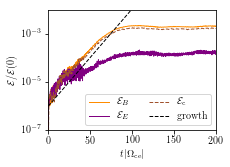

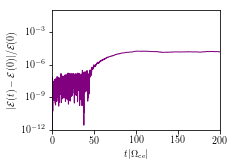

In [3]:
f1 = plt.figure()
f1.set_figheight(2.2)
f1.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot_Standard1e5 = en_B_Standard1e5 + en_E_Standard1e5 + en_C_Standard1e5 + en_H_Standard1e5

Nt = len(en_B_Standard1e5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B_Standard1e5/en_tot_Standard1e5[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E_Standard1e5/en_tot_Standard1e5[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C_Standard1e5/en_tot_Standard1e5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 1e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1,label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/energies_Standard_1e5.pgf', bbox_inches = 'tight')





f2 = plt.figure()
f2.set_figheight(2.2)
f2.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot_Standard1e5 - en_tot_Standard1e5[0])/en_tot_Standard1e5[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/error_Strang_10e5.pgf', bbox_inches = 'tight')

In [4]:
particles_Standard1e5 = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=1_Np=1e5_CVoff_particles.txt')

k = 2
wpar = 0.2
wperp = 0.53
Lz = 2*np.pi/k
wpe = 2
nuh = 0.06
nh = nuh*wpe**2
Np = 1e5
control = 0
wce = -1

def fh0(z, vx, vy, vz, eps):
    return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))

Text(0,0.5,'$\\Delta f_{\\mathrm{h}\\perp}c^3/|\\Omega_\\mathrm{ce}|$')

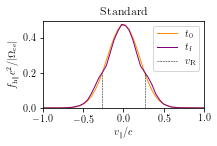

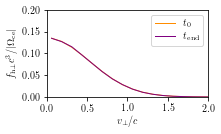

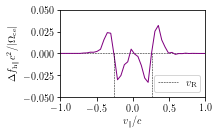

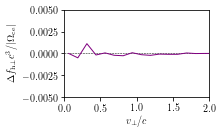

In [5]:
Nbin_par = 128
Nbin_perp = 32

Lv_par = 6
Lv_perp = 4

dv_bin_par = Lv_par/Nbin_par
v_bin_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
v_bin_par = np.delete(v_bin_par, -1) + dv_bin_par/2
Vedges_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
binVol_par = dv_bin_par

dv_bin_perp = Lv_perp/Nbin_perp
v_bin_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
v_bin_perp = np.delete(v_bin_perp, -1) + dv_bin_perp/2
Vedges_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
binVol_perp = dv_bin_perp


# ... initial distribution
f_par_ini = fh0(0, 0, 0, v_bin_par, 0)*2*np.pi*wperp**2
f_perp_ini = fh0(0, v_bin_perp/np.sqrt(2), v_bin_perp/np.sqrt(2), 0, 0)*np.sqrt(2*np.pi)*wpar
# ...



# ... later distribution
Vbin_par = np.digitize(particles_Standard1e5[:, 3], Vedges_par) - 1
Vbin_perp = np.digitize(np.sqrt(particles_Standard1e5[:, 1]**2 + particles_Standard1e5[:, 2]**2), Vedges_perp) - 1

f_par_Standard1e5 = np.bincount(Vbin_par, particles_Standard1e5[:, 4], Nbin_par)/(Np*binVol_par*Lz) + control*f_par_ini
f_perp_Standard1e5 = np.bincount(Vbin_perp, particles_Standard1e5[:, 4], Nbin_perp)/(Np*binVol_perp*Lz*v_bin_perp*2*np.pi) + control*f_perp_ini
# ...



# ... resonant velocity
k = 2
vR = np.abs((omega_r + wce)/k)
# ...

f3 = plt.figure()
f3.set_figheight(1.6)
f3.set_figwidth(2.9)


plt.plot(v_bin_par, f_par_ini, linewidth = 1, color = 'darkorange', label = '$t_0$')
plt.plot(v_bin_par, f_par_Standard1e5, linewidth = 1, color = 'purple', label = '$t_\mathrm{f}$')
plt.plot(np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
plt.plot(-np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', linewidth = 0.5)
plt.ylim((0, 0.5))
plt.xlim((-1, 1))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
plt.title('Standard')
plt.legend(loc = 'upper right')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/parallel_Standard_1e5.pgf', bbox_inches = 'tight')



f4 = plt.figure()
f4.set_figheight(1.6)
f4.set_figwidth(2.9)

plt.plot(v_bin_perp, f_perp_ini, label = '$t_0$', linewidth = 1, color = 'darkorange')
plt.plot(v_bin_perp, f_perp_Standard1e5, label = '$t_\mathrm{end}$', linewidth = 1, color = 'purple')
plt.xlabel('$v_\perp/c$')
plt.ylabel('$f_{\mathrm{h}\perp}c^3/|\Omega_\mathrm{ce}|$')
plt.ylim((0, 0.2))
plt.xlim((0, 2))
#plt.title('Initial and final perp. distribution')
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/perp_Standard_1e5.pgf', bbox_inches = 'tight')



f5 = plt.figure()
f5.set_figheight(1.6)
f5.set_figwidth(2.6)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(-1, 1, 10), np.zeros(10), 'k--', linewidth = 0.5)
plt.plot(v_bin_par, f_par_Standard1e5 - f_par_ini, linewidth = 1, color = 'purple')
plt.plot(np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
plt.plot(-np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--', linewidth = 0.5)
plt.legend(loc = 'lower right')

plt.xlim((-1, 1))
plt.ylim((-0.05, 0.05))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$\Delta f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
#plt.title('Difference parallel')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/diff_parallel_Standard_1e5.pgf', bbox_inches = 'tight')



f6 = plt.figure()
f6.set_figheight(1.6)
f6.set_figwidth(2.6)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(0, 2, 10), np.zeros(10), 'k--', linewidth = 0.5)
plt.plot(v_bin_perp, f_perp_Standard1e5 - f_perp_ini, linewidth = 1, color = 'purple')
plt.xlim((0, 2))
plt.ylim((-0.005, 0.005))
plt.xlabel('$v_\perp/c$')
plt.ylabel('$\Delta f_{\mathrm{h}\perp}c^3/|\Omega_\mathrm{ce}|$')
#plt.title('Difference perpendicular')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/diff_perp_Standard_1e5.pgf', bbox_inches = 'tight')

## 1. 2 GEMPIC: Lie-Trotter

In [6]:
data_Lie1e5 = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=1_Np=1e5_CVoff_Lie_GEMPIC.txt')

en_B_Lie1e5  = data_Lie1e5[:, 0]
en_E_Lie1e5  = data_Lie1e5[:, 1]
en_C_Lie1e5  = data_Lie1e5[:, 2]
en_H_Lie1e5  = data_Lie1e5[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

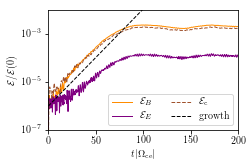

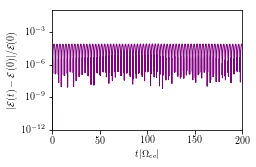

In [7]:
f7 = plt.figure()
f7.set_figheight(2.2)
f7.set_figwidth(3.4)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot_Lie1e5 = en_B_Lie1e5 + en_E_Lie1e5 + en_C_Lie1e5 + en_H_Lie1e5

Nt = len(en_B_Lie1e5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B_Lie1e5/en_tot_Lie1e5[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E_Lie1e5/en_tot_Lie1e5[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C_Lie1e5/en_tot_Lie1e5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 1e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1,label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/energies_Strang_10e5.pgf', bbox_inches = 'tight')





f8 = plt.figure()
f8.set_figheight(2.2)
f8.set_figwidth(3.4)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot_Lie1e5 - en_tot_Lie1e5[0])/en_tot_Lie1e5[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/error_Strang_10e5.pgf', bbox_inches = 'tight')

## 1. 3 GEMPIC: Strang

In [8]:
data_Strang1e5 = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=1_Np=1e5_CVoff_Strang_GEMPIC.txt')

en_B_Strang1e5  = data_Strang1e5[:, 0]
en_E_Strang1e5  = data_Strang1e5[:, 1]
en_C_Strang1e5  = data_Strang1e5[:, 2]
en_H_Strang1e5  = data_Strang1e5[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

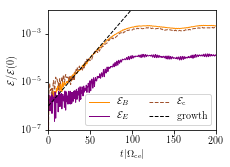

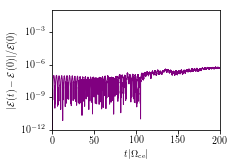

In [9]:
f9 = plt.figure()
f9.set_figheight(2.2)
f9.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot_Strang1e5 = en_B_Strang1e5 + en_E_Strang1e5 + en_C_Strang1e5 + en_H_Strang1e5

Nt = len(en_B_Strang1e5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C_Strang1e5/en_tot_Strang1e5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 1e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1, label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/energies_Strang_1e5.pgf', bbox_inches = 'tight')





f10 = plt.figure()
f10.set_figheight(2.2)
f10.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot_Strang1e5 - en_tot_Strang1e5[0])/en_tot_Strang1e5[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/error_Strang_10e5.pgf', bbox_inches = 'tight')

In [10]:
particles_Strang1e5 = np.loadtxt('data_wpe=2_wpar=0.2_wperp_0.53_nuh=0.06_L=pi_Nel=32_T=200_dt=0.0125_p=1_Np=1e5_CVoff_Strang_GEMPIC_particles.txt')

k = 2
wpar = 0.2
wperp = 0.53
Lz = 2*np.pi/k
wpe = 2
nuh = 0.06
nh = nuh*wpe**2
control = 0
wce = -1

def fh0(z, vx, vy, vz, eps):
    return (1 + eps*np.cos(k*z))*nh/((2*np.pi)**(3/2)*wpar*wperp**2)*np.exp(-vz**2/(2*wpar**2) - (vx**2 + vy**2)/(2*wperp**2))

Text(0,0.5,'$\\Delta f_{\\mathrm{h}\\perp}c^3/|\\Omega_\\mathrm{ce}|$')

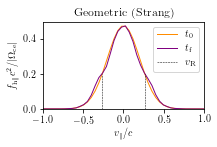

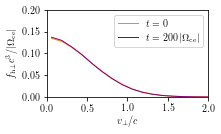

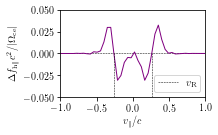

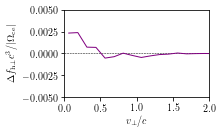

In [11]:
Nbin_par = 128
Nbin_perp = 32

Lv_par = 6
Lv_perp = 4

dv_bin_par = Lv_par/Nbin_par
v_bin_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
v_bin_par = np.delete(v_bin_par, -1) + dv_bin_par/2
Vedges_par = np.linspace(-Lv_par/2, Lv_par/2, Nbin_par + 1)
binVol_par = dv_bin_par

dv_bin_perp = Lv_perp/Nbin_perp
v_bin_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
v_bin_perp = np.delete(v_bin_perp, -1) + dv_bin_perp/2
Vedges_perp = np.linspace(0, Lv_perp, Nbin_perp + 1)
binVol_perp = dv_bin_perp


# ... initial distribution
f_par_ini = fh0(0, 0, 0, v_bin_par, 0)*2*np.pi*wperp**2
f_perp_ini = fh0(0, v_bin_perp/np.sqrt(2), v_bin_perp/np.sqrt(2), 0, 0)*np.sqrt(2*np.pi)*wpar
# ...



# ... later distribution
Vbin_par = np.digitize(particles_Strang1e5[:, 3], Vedges_par) - 1
Vbin_perp = np.digitize(np.sqrt(particles_Strang1e5[:, 1]**2 + particles_Strang1e5[:, 2]**2), Vedges_perp) - 1

f_par_Strang1e5 = np.bincount(Vbin_par, particles_Strang1e5[:, 4], Nbin_par)/(binVol_par*Lz) + control*f_par_ini
f_perp_Strang1e5 = np.bincount(Vbin_perp, particles_Strang1e5[:, 4], Nbin_perp)/(binVol_perp*Lz*v_bin_perp*2*np.pi) + control*f_perp_ini
# ...



# ... resonant velocity
k = 2
vR = np.abs((omega_r + wce)/k)
# ...

f11 = plt.figure()
f11.set_figheight(1.6)
f11.set_figwidth(2.9)


plt.plot(v_bin_par, f_par_ini, linewidth = 1, color = 'darkorange', label = '$t_0$')
plt.plot(v_bin_par, f_par_Strang1e5, linewidth = 1, color = 'purple', label = '$t_\mathrm{f}$')
plt.plot(np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
plt.plot(-np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', linewidth = 0.5)
plt.ylim((0, 0.5))
plt.xlim((-1, 1))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
plt.title('Geometric (Strang)')
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/parallel_Strang_1e5.pgf', bbox_inches = 'tight')



f12 = plt.figure()
f12.set_figheight(1.6)
f12.set_figwidth(2.9)

plt.plot(v_bin_perp, f_perp_ini, label = '$t=0$', linewidth = 1, color = 'darkorange')
plt.plot(v_bin_perp, f_perp_Strang1e5, label = '$t=200\,|\Omega_\mathrm{ce}|$', linewidth = 1, color = 'purple')
plt.xlabel('$v_\perp/c$')
plt.ylabel('$f_{\mathrm{h}\perp}c^3/|\Omega_\mathrm{ce}|$')
plt.ylim((0, 0.2))
plt.xlim((0, 2))
#plt.title('Initial and final perp. distribution')
plt.legend()
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/perp_Strang_1e5.pgf', bbox_inches = 'tight')



f13 = plt.figure()
f13.set_figheight(1.6)
f13.set_figwidth(2.6)

plt.plot(-2, 0, linewidth = 2)
plt.plot(np.linspace(-1, 1, 10), np.zeros(10), 'k--', linewidth = 0.5)
plt.plot(v_bin_par, f_par_Strang1e5 - f_par_ini, linewidth = 1, color = 'purple')
plt.plot(np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
plt.plot(-np.ones(10)*vR, np.linspace(-0.05, 0, 10), 'k--', linewidth = 0.5)
plt.legend(loc = 'lower right')

plt.xlim((-1, 1))
plt.ylim((-0.05, 0.05))
plt.xlabel('$v_\parallel/c$')
plt.ylabel('$\Delta f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
#plt.title('Difference parallel')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/diff_parallel_Strang_1e5.pgf', bbox_inches = 'tight')



f14 = plt.figure()
f14.set_figheight(1.6)
f14.set_figwidth(2.6)

plt.plot(-2, 0, linewidth = 1)
plt.plot(np.linspace(0, 2, 10), np.zeros(10), 'k--', linewidth = 0.5)
plt.plot(v_bin_perp, f_perp_Strang1e5 - f_perp_ini, linewidth = 1, color = 'purple')
plt.xlim((0, 2))
plt.ylim((-0.005, 0.005))
plt.xlabel('$v_\perp/c$')
plt.ylabel('$\Delta f_{\mathrm{h}\perp}c^3/|\Omega_\mathrm{ce}|$')
#plt.title('Difference perpendicular')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/diff_perp_Strang_1e5.pgf', bbox_inches = 'tight')

# 4. Comparison

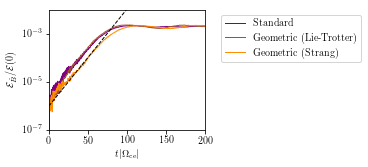

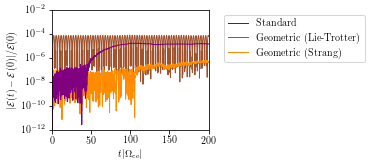

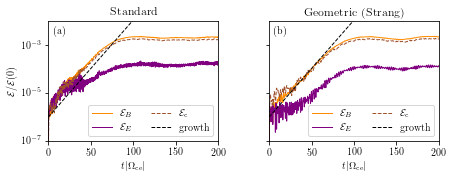

In [12]:
f15 = plt.figure()
f15.set_figheight(2.2)
f15.set_figwidth(2.8)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')


colors = ['purple', 'sienna', 'darkorange', 'royalblue', 'red']
labels = ['Standard', 'Geometric (Lie-Trotter)', 'Geometric (Strang)']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]

omega_r = np.real(omega)
gamma = np.imag(omega)

NtLie = len(en_B_Lie1e5) - 1
dt = 0.05/4
tnLie = np.linspace(0, NtLie*dt, NtLie + 1) 

NtStandard = len(en_B_Standard1e5) - 1
dt = 0.05/4
tnStandard = np.linspace(0, NtStandard*dt, NtStandard + 1) 

NtStrang = len(en_B_Strang1e5) - 1
dt = 0.05/4
tnStrang = np.linspace(0, NtStrang*dt, NtStrang + 1) 



plt.semilogy(tnStandard, en_B_Standard1e5/en_tot_Standard1e5[0], linewidth = 1, label = labels[0], color = colors[0])
plt.semilogy(tnLie, en_B_Lie1e5/en_tot_Lie1e5[0], linewidth = 1, label = labels[1], color = colors[1])
plt.semilogy(tnStrang, en_B_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = labels[2], color = colors[2])

plt.semilogy(tg, 1e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1)

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E}_{\tilde{B}} / \mathcal{E}(0)$')
plt.ylim((1e-7, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'upper center', ncol = 1, bbox_to_anchor = (1.55, 1.0))
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/comparison_magnetic_1e5.pgf', bbox_inches = 'tight')





f16 = plt.figure()
f16.set_figheight(2.2)
f16.set_figwidth(2.8)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')


plt.semilogy(tnLie, np.abs(en_tot_Lie1e5 - en_tot_Lie1e5[0])/en_tot_Lie1e5[0], linewidth = 1, color = 'sienna', label = 'Geometric (Lie-Trotter)')
plt.semilogy(tnStrang, np.abs(en_tot_Strang1e5 - en_tot_Strang1e5[0])/en_tot_Strang1e5[0], linewidth = 1, color = 'darkorange', label = 'Geometric (Strang)')
plt.semilogy(tnStandard, np.abs(en_tot_Standard1e5 - en_tot_Standard1e5[0])/en_tot_Standard1e5[0], linewidth = 1, color = 'purple', label = 'Standard')

plt.xlim((0, 200))
plt.ylim((1e-12, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')


handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper center', ncol = 1, bbox_to_anchor = (1.55, 1.0))

plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/comparison_energies_1e5.pdf', bbox_inches = 'tight')



# Simple data to display in various forms
f17, ((ax1), (ax2)) = plt.subplots(1, 2, sharey='row')
f17.set_figheight(2.2)
f17.set_figwidth(7)

en_tot_Standard1e5 = en_B_Standard1e5 + en_E_Standard1e5 + en_C_Standard1e5 + en_H_Standard1e5

Nt = len(en_B_Standard1e5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

ax1.semilogy(tn, en_B_Standard1e5/en_tot_Standard1e5[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
ax1.semilogy(tn, en_E_Standard1e5/en_tot_Standard1e5[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
ax1.semilogy(tn, en_C_Standard1e5/en_tot_Standard1e5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#ax1.semilogy(tn, en_H_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
ax1.semilogy(tg, 1e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1,label = 'growth')

ax1.set_xlabel('$t|\Omega_\mathrm{ce}|$')
ax1.set_ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
ax1.set_ylim((1e-7, 1e-2))
ax1.set_xlim((0, 200))
ax1.set_title('Standard')
ax1.legend(loc = 'lower right', ncol = 2)
ax1.text(5, 3e-3, '(a)')




en_tot_Strang1e5 = en_B_Strang1e5 + en_E_Strang1e5 + en_C_Strang1e5 + en_H_Strang1e5

Nt = len(en_B_Strang1e5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

ax2.semilogy(tn, en_B_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
ax2.semilogy(tn, en_E_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
ax2.semilogy(tn, en_C_Strang1e5/en_tot_Strang1e5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#ax2.semilogy(tn, en_H_Strang1e5/en_tot_Strang1e5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
ax2.semilogy(tg, 1e-6*np.exp(tg*gamma*2), 'k--', linewidth = 1,label = 'growth')

ax2.set_xlabel('$t|\Omega_\mathrm{ce}|$')
ax2.set_ylim((1e-7, 1e-2))
ax2.set_xlim((0, 200))
ax2.set_title('Geometric (Strang)')
ax2.legend(loc = 'lower right', ncol = 2)
f17.subplots_adjust(wspace=0.3)
ax2.text(5, 3e-3, '(b)')

plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/comparison_1e5.pdf', bbox_inches = 'tight')

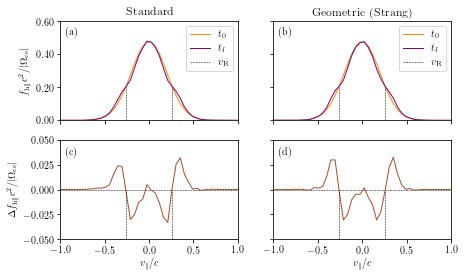

In [13]:
# Simple data to display in various forms
fn, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
fn.set_figheight(4)
fn.set_figwidth(7)

ax1.plot(v_bin_par, f_par_ini, linewidth = 1, color = 'darkorange', label = '$t_0$')
ax1.plot(v_bin_par, f_par_Standard1e5, linewidth = 1, color = 'purple', label = '$t_\mathrm{f}$')
ax1.plot(np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
ax1.plot(-np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', linewidth = 0.5)
ax1.set_xlim((-1.0, 1.0))
ax1.set_ylim((0, 0.6))
ax1.set_title('Standard')
ax1.set_ylabel('$f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
ax1.legend()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax1.set_yticks([0.1, 0.2, 0.3, 0.4])
ax1.text(-0.95, 0.52, '(a)')

ax2.plot(v_bin_par, f_par_ini, linewidth = 1, color = 'darkorange', label = '$t_0$')
ax2.plot(v_bin_par, f_par_Strang1e5, linewidth = 1, color = 'purple', label = '$t_\mathrm{f}$')
ax2.plot(np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
ax2.plot(-np.ones(10)*vR, np.linspace(0, fh0(0, 0, 0, vR, 0)*2*np.pi*wperp**2, 10), 'k--', linewidth = 0.5)
ax2.set_xlim((-1.0, 1.0))
ax2.set_ylim((0, 0.6))
ax2.set_title('Geometric (Strang)')
ax2.legend()
ax2.text(-0.95, 0.52, '(b)')


ax3.plot(np.linspace(-1, 1, 10), np.zeros(10), 'k--', linewidth = 0.5)
ax3.plot(v_bin_par, f_par_Standard1e5 - f_par_ini, linewidth = 1, color = 'sienna')
ax3.plot(np.ones(10)*vR, np.linspace(-0.1, 0, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
ax3.plot(-np.ones(10)*vR, np.linspace(-0.1, 0, 10), 'k--', linewidth = 0.5)
ax3.set_xlim((-1.0, 1.0))
ax3.set_ylim((-0.05, 0.05))
ax3.set_xlabel('$v_\parallel/c$')
ax3.set_ylabel('$\Delta f_{\mathrm{h}\parallel}c^2/|\Omega_\mathrm{ce}|$')
ax3.text(-0.95, 0.035, '(c)')

ax4.plot(np.linspace(-1, 1, 10), np.zeros(10), 'k--', linewidth = 0.5)
ax4.plot(v_bin_par, f_par_Strang1e5 - f_par_ini, linewidth = 1, color = 'sienna')
ax4.plot(np.ones(10)*vR, np.linspace(-0.1, 0, 10), 'k--', label = '$v_\mathrm{R}$', linewidth = 0.5)
ax4.plot(-np.ones(10)*vR, np.linspace(-0.1, 0, 10), 'k--', linewidth = 0.5)
ax4.set_xlim((-1.0, 1.0))
ax4.set_ylim((-0.05, 0.05))
ax4.set_xlabel('$v_\parallel/c$')
ax4.text(-0.95, 0.035, '(d)')


# Bring subplots close to each other.
fn.subplots_adjust(hspace=0.2)
fn.subplots_adjust(wspace=0.2)

plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/distribution_functions_1e5.pdf', bbox_inches = 'tight')

# $10^6$ particles

# 1. Standard

In [39]:
data4 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/mhd/02_HybridModelling/Results/01_NoDipoleField/data_T=200_N=32_dt=0.0125_p=1_Np=1e6_amp=1e-4_NoCV.txt')

en_E4  = data4[1:, -5]
en_B4  = data4[1:, -4]
en_C4  = data4[1:, -3]
en_H4  = data4[1:, -2]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

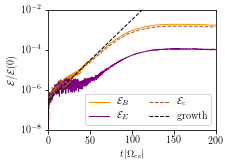

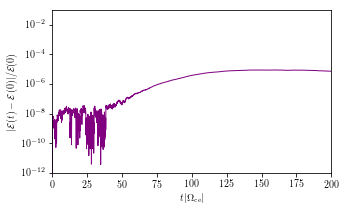

In [40]:
f9 = plt.figure()
f9.set_figheight(2.2)
f9.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot4 = en_B4 + en_E4 + en_C4 + en_H4

Nt = len(en_B4) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B4/en_tot4[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E4/en_tot4[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C4/en_tot4[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H4/en_tot4[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-7*np.exp(tg*gamma*2), 'k--', linewidth = 1, label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/energies_standard_10e6.pgf', bbox_inches = 'tight')





f10 = plt.figure()
f10.set_figheight(3)
f10.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot4 - en_tot4[0])/en_tot4[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/error_standard_10e6.pgf', bbox_inches = 'tight')

# 2. GEMPIC: Lie-Trotter

In [41]:
data5 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/learning-python/data_Nel=32_dt=0.0125_Np=1e6_T=200_amp=1e-4_p=1_FirstLie_NoCV')

en_B5  = data5[:, 0]
en_E5  = data5[:, 1]
en_C5  = data5[:, 2]
en_H5  = data5[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

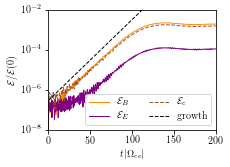

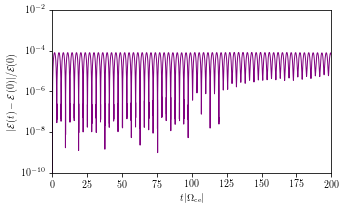

In [42]:
f11 = plt.figure()
f11.set_figheight(2.2)
f11.set_figwidth(3.0)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot5 = en_B5 + en_E5 + en_C5 + en_H5

Nt = len(en_B5) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B5/en_tot5[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E5/en_tot5[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C5/en_tot5[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H5/en_tot5[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-7*np.exp(tg*gamma*2), 'k--', linewidth = 1, label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/energies_LieTrotter_10e6.pgf', bbox_inches = 'tight')






f12 = plt.figure()
f12.set_figheight(3)
f12.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot5 - en_tot5[0])/en_tot5[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-10, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/error_LieTrotter_10e6.pgf', bbox_inches = 'tight')

# 3. GEMPIC: Strang

In [44]:
data6 = np.loadtxt('/home/florian/Schreibtisch/Masterarbeit/06_Github/learning-python/data_Nel=32_dt=0.0125_Np=1e6_T=200_amp=1e-4_p=1_SecondStrang_NoCV')

en_B6  = data6[:, 0]
en_E6  = data6[:, 1]
en_C6  = data6[:, 2]
en_H6  = data6[:, 3]

Text(0,0.5,'$|\\mathcal{E}(t) - \\mathcal{E}(0)|/\\mathcal{E}(0)$')

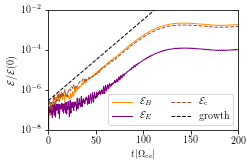

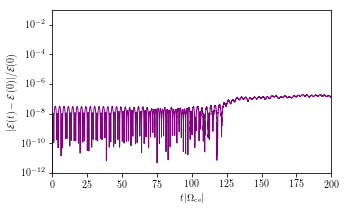

In [45]:
f13 = plt.figure()
f13.set_figheight(2.2)
f13.set_figwidth(3.4)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

en_tot6 = en_B6 + en_E6 + en_C6 + en_H6

Nt = len(en_B6) - 1
dt = 0.05/4
tn = np.linspace(0, Nt*dt, Nt + 1) 
tg = np.linspace(0, 120, 100)

colors = ['darkorange', 'purple', 'sienna', 'royalblue']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]
omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B6/en_tot6[0], linewidth = 1, label = r'$\mathcal{E}_{B}$', color = colors[0])
plt.semilogy(tn, en_E6/en_tot6[0], linewidth = 1, label = r'$\mathcal{E}_{E}$', color = colors[1])
plt.semilogy(tn, en_C6/en_tot6[0], '--', linewidth = 1, label = r'$\mathcal{E}_\mathrm{c}$', color = colors[2])
#plt.semilogy(tn, en_H6/en_tot6[0], linewidth = 1, label = r'$\mathcal{E}_\mathrm{h}$', color = colors[3])
plt.semilogy(tg, 3e-7*np.exp(tg*gamma*2), 'k--', linewidth = 1,label = 'growth')

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e-2))
plt.xlim((0, 200))
plt.legend(loc = 'lower right', ncol = 2)
plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/energies_Strang_10e6.pgf', bbox_inches = 'tight')





f14 = plt.figure()
f14.set_figheight(3)
f14.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.semilogy(tn, np.abs(en_tot6 - en_tot6[0])/en_tot6[0], linewidth = 1, color = 'purple')
plt.xlim((0, 200))
plt.ylim((1e-12, 1e-1))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/error_Strang_10e6.pgf', bbox_inches = 'tight')

# 4. Comparison

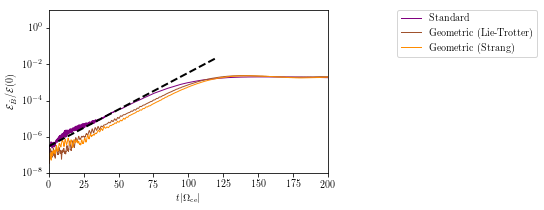

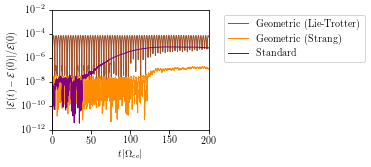

In [47]:
f15 = plt.figure()
f15.set_figheight(3)
f15.set_figwidth(5)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')


colors = ['purple', 'sienna', 'darkorange', 'royalblue', 'red']
labels = ['Standard', 'Geometric (Lie-Trotter)', 'Geometric (Strang)']

omega = utils.solveDispersionHybrid(2., +1, 1, -1, 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-8)[0]

omega_r = np.real(omega)
gamma = np.imag(omega)

plt.semilogy(tn, en_B4/en_tot4[0], linewidth = 1, label = labels[0], color = colors[0])
plt.semilogy(tn, en_B5/en_tot5[0], linewidth = 1, label = labels[1], color = colors[1])
plt.semilogy(tn, en_B6/en_tot6[0], linewidth = 1, label = labels[2], color = colors[2])

plt.semilogy(tg, 3e-7*np.exp(tg*gamma*2), 'k--', linewidth = 2)

plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel(r'$\mathcal{E}_{\tilde{B}} / \mathcal{E}(0)$')
plt.ylim((1e-8, 1e1))
plt.xlim((0, 200))
plt.legend(loc = 'upper center', ncol = 1, bbox_to_anchor = (1.5, 1.03))
#plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/comparison_magnetic_10e6.pgf', bbox_inches = 'tight')




f16 = plt.figure()
f16.set_figheight(2.2)
f16.set_figwidth(2.8)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')



plt.semilogy(tn, np.abs(en_tot5 - en_tot5[0])/en_tot5[0], linewidth = 1, color = 'sienna', label = 'Geometric (Lie-Trotter)')
plt.semilogy(tn, np.abs(en_tot6 - en_tot6[0])/en_tot6[0], linewidth = 1, color = 'darkorange', label = 'Geometric (Strang)')
plt.semilogy(tn, np.abs(en_tot4 - en_tot4[0])/en_tot4[0], linewidth = 1, color = 'purple', label = 'Standard')


plt.xlim((0, 200))
plt.ylim((1e-12, 1e-2))
plt.xlabel('$t|\Omega_\mathrm{ce}|$')
plt.ylabel('$|\mathcal{E}(t) - \mathcal{E}(0)|/\mathcal{E}(0)$')
plt.legend(loc = 'upper center', ncol = 1, bbox_to_anchor = (1.55, 1.0))
plt.savefig('/home/florian/Schreibtisch/PHD/02_Projekte/hylife/papers/01_Comp_FEEC_standard/01_Figures/comparison_energies_10e6.pgf', bbox_inches = 'tight')